In [288]:
import numpy as np
import os
from scipy import interpolate
import matplotlib.pyplot as plt

# Reading the Batch file

#Batch_file = open(r"C:\Users\vinay\OneDrive - Clemson University\ME8710\FinalExam\Test Run\Batch.txt")
#Batch_content = Batch_file.read()
#Batch_content = Batch_content.split('\n')
#Batch = np.asarray(Batch_content)
Batch = np.loadtxt(r"C:\Users\vinay\OneDrive - Clemson University\ME8710\FinalExam\Test Run\Batch.txt")

# Reading Rocket data

Rocket_data = np.loadtxt(r"C:\Users\vinay\OneDrive - Clemson University\ME8710\FinalExam\Test Run\RocketData.txt")
#print(Rocket_data[:, 0])

# Design Variables - Types & Number of Engines

n_stages = float(Batch[1])        # No. of stages
n_boosters = float(Batch[2])      # No. of boosters
booster_type = float(Batch[3])    # Booster type(1-32)
fsengine_type = float(Batch[5])   # First-stage engine type 
n_fsengine = float(Batch[6])      # No. of First-stage engine
ssengine_type = float(Batch[8])   # 2nd stage engine type
n_ssengine = float(Batch[9])      # No. of 2nd stage engines
print(n_ssengine)

# Design Variables - Throttle map time

T_tD = float(Batch[21])           # Throttle down
T_tDC = float(Batch[23])          # Throttle down complete
throttle_Ttdc = float(Batch[24])  # Throttle value at T_tDC
T_tU = float(Batch[25])           # Throttle up
T_tUC = float(Batch[27])          # Throttle up complete
T_meco = float(Batch[29])         # Main engine cut-off time
T_2SI = float(Batch[31])          # 2nd stage ignition time
T_2ECO = float(Batch[33])         # 2nd stage cut-off time

# Circle packing formula setup to calculate Main Stage diameter

c_enc = np.array([[1.0, 1.0],[2.0, 2.0],[3.0, 2.154],
                [4.0, 2.414],[5.0, 2.701],[6.0, 3.0],
                [7.0, 3.0],[8.0, 3.304],[9.0, 3.613],
                [10.0, 3.813],[11.0, 3.923],[12.0, 4.029],
                [13.0, 4.236],[14.0, 4.328],[15.0, 4.521],
                [16.0, 4.615],[17.0, 4.792],[18.0, 4.863],
                [19.0, 4.863],[20.0, 5.122]])

x = c_enc[:, 0]
y = c_enc[:, 1]
f = interpolate.interp1d(x, y, fill_value='extrapolate')

# getting the diameter of First stage engine from Rocket Data

for i in range(len(Rocket_data[:, 0])):
    #print(Rocket_data[i, 7], Rocket_data[i, 0])
    if Rocket_data[i, 0] == fsengine_type:
        fsengine_dia = Rocket_data[i, 7]
    
dia_ms = 1.1*fsengine_dia*f(n_fsengine)
#print(dia_ms)
#print(Batch[47])

2.0


In [289]:
# Running RocketSim.exe
import subprocess
import time
from keyboard import press

os.chdir(r'C:\Users\vinay\OneDrive - Clemson University\ME8710\FinalExam\Test Run')
#p=subprocess.Popen(r'C:\Users\vinay\OneDrive - Clemson University\ME8710\FinalExam\Test Run\RocketSim.exe')
#subprocess.check_output('Taskkill /PID %d /F' % pid)
#p.terminate()


os.startfile(r'C:\Users\vinay\OneDrive - Clemson University\ME8710\FinalExam\Test Run\RocketSim.exe')
time.sleep(1)
press('enter')
#time.sleep(1)
#os.system('taskkill /F /im RocketSim.exe')

In [290]:
# Read the telemetry data
import pandas as pd

df = pd.read_csv(r'C:\Users\vinay\OneDrive - Clemson University\ME8710\FinalExam\Test Run\Telemetry.txt', sep = ' ', index_col=False)
Telemetry = df.to_numpy()
#Telemetry = np.loadtxt(r"C:\Users\vinay\OneDrive - Clemson University\ME8710\FinalExam\Test Run\Telemetry.txt", skiprows=1)

r_time = Telemetry[:, 0]
thrust = Telemetry[:, 1]
mass = Telemetry[:, 2]
altitude = Telemetry[:, 3]
velocity = Telemetry[:, 4]
acceleration = Telemetry[:, 5]
MaxQ = Telemetry[:, 12]
orbital_acc = Telemetry[:, 14]
np.amax(np.abs(acceleration))

27.1636

In [291]:
import random
import pandas as pd
from math import exp

# Optimizing throttle map
def ThrotOpt(Batch, iters, ss, temp):
    
    # Throttle Map - Initial Values
    T_tD_initial = float(Batch[21])           # Throttle down
    T_tDC_initial = float(Batch[23])          # Throttle down complete
    throttle_Ttdc_initial = float(Batch[24])  # Throttle value at T_tDC
    T_tU_initial = float(Batch[25])           # Throttle up
    T_tUC_initial = float(Batch[27])          # Throttle up complete
    T_meco_initial = float(Batch[29])         # Main engine cut-off time
    T_2SI_initial = float(Batch[31])          # 2nd stage ignition time
    T_2ECO_initial = float(Batch[33])         # 2nd stage cut-off time
    
    # Throttle Map - Current Values
    T_tD_curr = T_tD_initial           # Throttle down
    T_tDC_curr = T_tDC_initial          # Throttle down complete
    throttle_Ttdc_curr = throttle_Ttdc_initial  # Throttle value at T_tDC
    T_tU_curr = T_tU_initial           # Throttle up
    T_tUC_curr = T_tUC_initial          # Throttle up complete
    T_meco_curr = T_meco_initial         # Main engine cut-off time
    T_2SI_curr = T_2SI_initial          # 2nd stage ignition time
    T_2ECO_curr = T_2ECO_initial         # 2nd stage cut-off time
    
    
    
    
    
    # Running RocketSim.exe
    os.chdir(r'C:\Users\vinay\OneDrive - Clemson University\ME8710\FinalExam\Test Run')
    os.startfile(r'C:\Users\vinay\OneDrive - Clemson University\ME8710\FinalExam\Test Run\RocketSim.exe')
    time.sleep(1)
    press('enter')
    # Getting telemetry values
    up_file = open(r'C:\Users\vinay\OneDrive - Clemson University\ME8710\FinalExam\Test Run\Telemetry.txt', 'r+')
    df = pd.read_csv(up_file, sep = ' ', index_col=False, error_bad_lines=False)
    Telemetry = df.to_numpy()
    
    curr_m_vel = np.amax(Telemetry[:, 4])
    
    op_model = np.loadtxt(r"C:\Users\vinay\OneDrive - Clemson University\ME8710\FinalExam\Test Run\Rocket.txt")
    timp_model = op_model
    
    prob = []
    
    for i in range(iters):
        
        curr_m_vel = np.amax(Telemetry[:, 4])
        #step = (ss * float(random.randint(-10, 10)))
        # Throttle Map - Step Values
        
        print('iter:', i)
        print('[', T_tD_curr, T_tDC_curr, throttle_Ttdc_curr, T_tU_curr, T_tUC_curr, T_meco_curr, T_2SI_curr, T_2ECO_curr, ']')
        
        T_tD_step = T_tD_curr + (ss * float(random.randrange(-10, 10, 1)))        # Throttle down
        temp = T_tD_step
        
        while (temp < (T_tD_step + 1)):
            temp = T_tDC_curr + (ss * float(random.randrange(-10, 10, 1)))        # Throttle down complete
        T_tDC_step = temp
            
        throttle_Ttdc_step = (random.randint(6,9))/10                             # Throttle value at T_tDC
        
        while (temp < (T_tDC_step + 1)):
            temp = T_tU_curr + (ss * float(random.randrange(-10, 10, 1)))
        T_tU_step = temp                                                      # Throttle up
            
        while (temp < (T_tU_step + 1)):
            temp = T_tUC_curr + (ss * float(random.randrange(-10, 10, 1)))
        T_tUC_step = temp                                                     # Throttle up complete
        
        while (temp < (T_tUC_step + 1)):
            temp = T_meco_curr + (ss * float(random.randrange(-10, 10, 1)))
        T_meco_step = temp                                                    # Main engine cut-off time
        
        while (temp < (T_meco_step + 1)):
            temp = T_2SI_curr + (ss * float(random.randrange(-10, 10, 1)))
        T_2SI_step = temp                                                     # 2nd stage ignition time
        
        while (temp < (T_2SI_step + 1)):
            temp = T_2ECO_curr + (ss * float(random.randrange(-10, 10, 1)))
        T_2ECO_step = temp                                                    # 2nd stage cut-off time

        Batch[21] = T_tD_step
        Batch[23] = T_tDC_step
        Batch[24] = throttle_Ttdc_step
        Batch[25] = T_tU_step
        Batch[27] = T_tUC_step
        Batch[29] = T_meco_step
        Batch[31] = T_2SI_step
        Batch[33] = T_2ECO_step
        
        #print(Batch)
        np.savetxt(r"C:\Users\vinay\OneDrive - Clemson University\ME8710\FinalExam\Test Run\Batch.txt", Batch, fmt = '%s')
        
        # Running RocketSim.exe
        os.chdir(r'C:\Users\vinay\OneDrive - Clemson University\ME8710\FinalExam\Test Run')
        os.startfile(r'C:\Users\vinay\OneDrive - Clemson University\ME8710\FinalExam\Test Run\RocketSim.exe')
        time.sleep(3)
        press('enter')
        # Getting telemetry values
        up_file = open(r'C:\Users\vinay\OneDrive - Clemson University\ME8710\FinalExam\Test Run\Telemetry.txt', 'r+')
        df = pd.read_csv(up_file, sep = ' ', index_col=False, error_bad_lines=False)
        Telemetry = df.to_numpy()
        #print(Telemetry)
        up_file.truncate(0)
    
        #Telemetry = np.loadtxt(r"C:\Users\vinay\OneDrive - Clemson University\ME8710\FinalExam\Test Run\Telemetry.txt", delimiter=' ', skiprows=1)
        r_time = Telemetry[:, 0]
        thrust = Telemetry[:, 1]
        mass = Telemetry[:, 2]
        altitude = Telemetry[:, 3]
        velocity = Telemetry[:, 4]
        acceleration = Telemetry[:, 5].astype(float)
        MaxQ = Telemetry[:, 12]
        
        m_acc = np.amax(np.abs(acceleration))
        m_vel = np.amax(velocity)
        m_maxq = np.amax(MaxQ)
        
        if (m_maxq <= 33400):
            if (m_acc <= 80):
                if (m_vel >= 15456) and (m_vel <= 15656):
                    curr_model = np.loadtxt(r"C:\Users\vinay\OneDrive - Clemson University\ME8710\FinalExam\Test Run\Rocket.txt")
                    op_model = np.vstack((op_model, curr_model))
                    # Updating initial values
                    T_tD_initial = T_tD_step           # Throttle down
                    T_tDC_initial = T_tDC_step          # Throttle down complete
                    throttle_Ttdc_initial = throttle_Ttdc_step  # Throttle value at T_tDC
                    T_tU_initial = T_tU_step           # Throttle up
                    T_tUC_initial = T_tUC_step          # Throttle up complete
                    T_meco_initial = T_meco_step         # Main engine cut-off time
                    T_2SI_initial = T_2SI_step          # 2nd stage ignition time
                    T_2ECO_initial = T_2ECO_step         # 2nd stage cut-off time
                
                elif (m_vel >= 11500) and (m_vel <= 17000):
                    curr_model = np.loadtxt(r"C:\Users\vinay\OneDrive - Clemson University\ME8710\FinalExam\Test Run\Rocket.txt")
                    timp_model = np.vstack((timp_model, curr_model))
                    
                    # Updating current values
                    T_tD_curr = T_tD_step           # Throttle down
                    T_tDC_curr = T_tDC_step          # Throttle down complete
                    throttle_Ttdc_curr = throttle_Ttdc_step  # Throttle value at T_tDC
                    T_tU_curr = T_tU_step           # Throttle up
                    T_tUC_curr = T_tUC_step          # Throttle up complete
                    T_meco_curr = T_meco_step         # Main engine cut-off time
                    T_2SI_curr = T_2SI_step          # 2nd stage ignition time
                    T_2ECO_curr = T_2ECO_step         # 2nd stage cut-off time
                
                delta = (curr_m_vel - m_vel)
                t_step = temp/float(i+1)
                m = exp(-(abs(delta))/t_step)
                prob.append(m)
                
                if delta < 0 or np.random.rand() < m:
                    
                    # Updating current values
                    T_tD_curr = T_tD_step           # Throttle down
                    T_tDC_curr = T_tDC_step          # Throttle down complete
                    throttle_Ttdc_curr = throttle_Ttdc_step  # Throttle value at T_tDC
                    T_tU_curr = T_tU_step           # Throttle up
                    T_tUC_curr = T_tUC_step          # Throttle up complete
                    T_meco_curr = T_meco_step         # Main engine cut-off time
                    T_2SI_curr = T_2SI_step          # 2nd stage ignition time
                    T_2ECO_curr = T_2ECO_step         # 2nd stage cut-off time
                    
                    curr_model = np.loadtxt(r"C:\Users\vinay\OneDrive - Clemson University\ME8710\FinalExam\Test Run\Rocket.txt")
                # Updating current values
                #T_tD_curr = T_tD_step           # Throttle down
                #T_tDC_curr = T_tDC_step          # Throttle down complete
                #throttle_Ttdc_curr = throttle_Ttdc_step  # Throttle value at T_tDC
                #T_tU_curr = T_tU_step           # Throttle up
                #T_tUC_curr = T_tUC_step          # Throttle up complete
                #T_meco_curr = T_meco_step         # Main engine cut-off time
                #T_2SI_curr = T_2SI_step          # 2nd stage ignition time
                #T_2ECO_curr = T_2ECO_step         # 2nd stage cut-off time
        
    return op_model, timp_model, curr_model, prob

i = 50
ss = 1
t = 100
op, timp, curr, probs = ThrotOpt(Batch, i, ss, t)

    

C:\Users\vinay\AppData\Local\Temp/ipykernel_22212/412625374.py:186: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  op, timp, curr, probs = ThrotOpt(Batch, i, ss, t)


iter: 0
[ 131.0 147.0 0.7 159.0 233.0 467.0 500.0 782.0 ]
iter: 1
[ 129.0 140.0 0.9 158.0 241.0 473.0 504.0 784.0 ]
iter: 2
[ 133.0 149.0 0.9 164.0 237.0 482.0 498.0 780.0 ]
iter: 3
[ 133.0 149.0 0.9 164.0 237.0 482.0 498.0 780.0 ]
iter: 4
[ 133.0 149.0 0.9 164.0 237.0 482.0 498.0 780.0 ]
iter: 5
[ 133.0 149.0 0.9 164.0 237.0 482.0 498.0 780.0 ]
iter: 6
[ 136.0 144.0 0.8 173.0 232.0 487.0 488.0 784.0 ]
iter: 7
[ 136.0 144.0 0.8 173.0 232.0 487.0 488.0 784.0 ]
iter: 8
[ 136.0 144.0 0.8 173.0 232.0 487.0 488.0 784.0 ]
iter: 9
[ 136.0 144.0 0.8 173.0 232.0 487.0 488.0 784.0 ]
iter: 10
[ 135.0 141.0 0.9 168.0 238.0 496.0 497.0 777.0 ]
iter: 11
[ 135.0 141.0 0.9 168.0 238.0 496.0 497.0 777.0 ]
iter: 12
[ 135.0 141.0 0.9 168.0 238.0 496.0 497.0 777.0 ]
iter: 13
[ 140.0 142.0 0.6 162.0 231.0 494.0 505.0 780.0 ]
iter: 14
[ 146.0 147.0 0.6 160.0 230.0 485.0 495.0 780.0 ]
iter: 15
[ 139.0 145.0 0.7 161.0 223.0 486.0 502.0 779.0 ]
iter: 16
[ 139.0 145.0 0.7 161.0 223.0 486.0 502.0 779.0 ]
iter: 1

In [299]:
op

array([2.00000e+00, 4.00000e+00, 2.30000e+01, 1.00000e+00, 1.15000e+02,
       3.00000e+00, 1.00000e+00, 2.19000e+02, 2.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       1.31000e+02, 1.00000e+00, 1.47000e+02, 7.00000e-01, 1.59000e+02,
       8.00000e-01, 2.33000e+02, 1.00000e+00, 4.67000e+02, 0.00000e+00,
       5.00000e+02, 1.00000e+00, 7.82000e+02, 0.00000e+00, 8.01000e+02,
       0.00000e+00, 8.02000e+02, 0.00000e+00, 8.03000e+02, 0.00000e+00,
       8.04000e+02, 0.00000e+00, 8.05000e+02, 0.00000e+00, 8.06000e+02,
       0.00000e+00, 6.40000e+00, 2.50000e+04, 2.17600e+05, 2.16000e+04,
       8.07222e+05, 6.36831e+04, 9.86227e+04, 1.06387e+04, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       8.45000e+01, 4.67500e+02, 7.82500e+02, 0.00000e+00, 0.00000e+00,
       0.00000e+00])

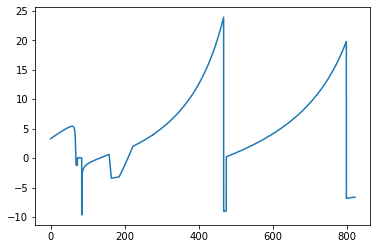

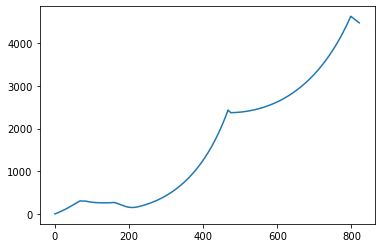

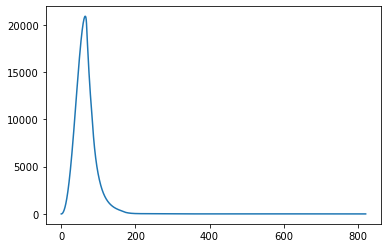

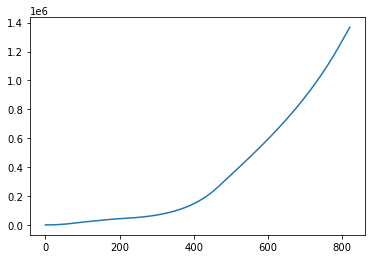

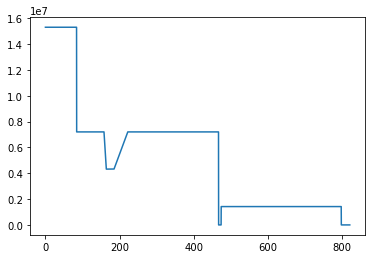

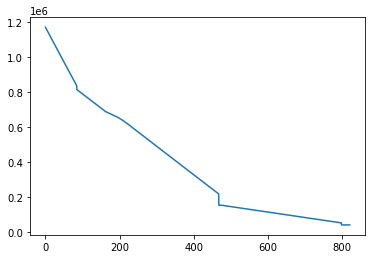

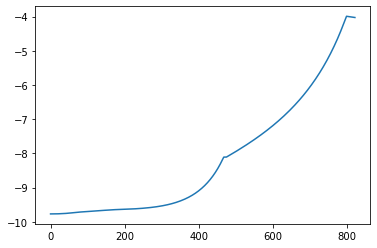

In [284]:
# Plotting acceleration, velocity, MaxQ & Altitude maps

plt.figure(1)
plt.plot(r_time, acceleration)

plt.figure(2)
plt.plot(r_time, velocity)

plt.figure(3)
plt.plot(r_time, MaxQ)

plt.figure(4)
plt.plot(r_time, altitude)

plt.figure(5)
plt.plot(r_time, thrust)

plt.figure(6)
plt.plot(r_time, mass)

plt.figure(7)
plt.plot(r_time, orbital_acc)

In [279]:
# Writing batch file
n_fsengine -= 1
n_boosters += 0
n_ssengine += 0

for i in range(len(Rocket_data[:, 0])):
    #print(Rocket_data[i, 7], Rocket_data[i, 0])
    if Rocket_data[i, 0] == fsengine_type:
        fsengine_dia = Rocket_data[i, 7]
    
dia_ms = 1.1*fsengine_dia*f(n_fsengine)

# Design Variables - Types & Number of Engines

Batch[1] = n_stages        # No. of stages
Batch[2] = n_boosters      # No. of boosters
Batch[3] = booster_type     # Booster type(1-32)
Batch[5] = fsengine_type   # First-stage engine type 
Batch[6] = n_fsengine      # No. of First-stage engine
Batch[8] = ssengine_type   # 2nd stage engine type
Batch[9] = n_ssengine      # No. of 2nd stage engines
Batch[47] = round(dia_ms, 2)

# Design Variables - Throttle map time

Batch[21] = T_tD           # Throttle down
Batch[23] = T_tDC          # Throttle down complete
Batch[24] = throttle_Ttdc  # Throttle value at T_tDC
Batch[25] = T_tU           # Throttle up
Batch[27] = T_tUC          # Throttle up complete
Batch[29] = T_meco         # Main engine cut-off time
Batch[31] = T_2SI          # 2nd stage ignition time
Batch[33] = T_2ECO         # 2nd stage cut-off time

np.savetxt(r"C:\Users\vinay\OneDrive - Clemson University\ME8710\FinalExam\Test Run\Batch.txt", Batch, fmt = '%s')

In [302]:
print(op)

[2.00000e+00 4.00000e+00 2.30000e+01 1.00000e+00 1.15000e+02 3.00000e+00
 1.00000e+00 2.19000e+02 2.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 1.00000e+00 1.31000e+02 1.00000e+00 1.47000e+02 7.00000e-01
 1.59000e+02 8.00000e-01 2.33000e+02 1.00000e+00 4.67000e+02 0.00000e+00
 5.00000e+02 1.00000e+00 7.82000e+02 0.00000e+00 8.01000e+02 0.00000e+00
 8.02000e+02 0.00000e+00 8.03000e+02 0.00000e+00 8.04000e+02 0.00000e+00
 8.05000e+02 0.00000e+00 8.06000e+02 0.00000e+00 6.40000e+00 2.50000e+04
 2.17600e+05 2.16000e+04 8.07222e+05 6.36831e+04 9.86227e+04 1.06387e+04
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 8.45000e+01 4.67500e+02 7.82500e+02 0.00000e+00 0.00000e+00 0.00000e+00]


In [202]:
import pandas as pd

up_file = open(r'C:\Users\vinay\OneDrive - Clemson University\ME8710\FinalExam\Test Run\Telemetry.txt', 'r+')
df = pd.read_csv(up_file, sep = ' ', index_col=False, error_bad_lines=False)
#up_file.truncate(0)
x = df.to_numpy()
print(x.shape)
print(i)  
print(x[0,:])

(8211, 17)
117
[ 0.00000e+00  1.53029e+07  1.13502e+06  3.00000e+00  0.00000e+00
  3.68421e+00  1.18568e+00  1.01290e+05  2.97981e+02  7.50000e-01
  0.00000e+00  9.79827e+00  0.00000e+00  0.00000e+00 -9.77207e+00
  0.00000e+00  3.00000e-03]


In [159]:

for i in range(len(Rocket_data[:, 0])):
    #print(Rocket_data[i, 7], Rocket_data[i, 0])
    if Rocket_data[i, 0] == fsengine_type:
        fsengine_dia = Rocket_data[i, 7]
    
dia_ms = 1.1 * fsengine_dia * f(n_fsengine)
print(n_fsengine)
dia_ms

3.0


6.397380000000001

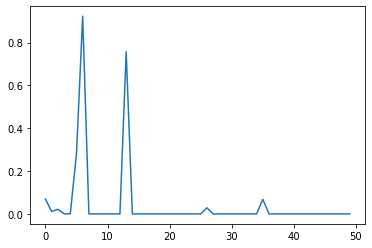

In [287]:
plt.plot(probs)

In [300]:
Batch0 = Batch[0]
Batch = np.loadtxt(r"C:\Users\vinay\OneDrive - Clemson University\ME8710\FinalExam\Test Run\Rocket.txt")
Batch = np.insert(curr, 0, 1.0, axis=0)
np.savetxt(r"C:\Users\vinay\OneDrive - Clemson University\ME8710\FinalExam\Test Run\Batch.txt", Batch, fmt = '%s')

os.startfile(r'C:\Users\vinay\OneDrive - Clemson University\ME8710\FinalExam\Test Run\RocketSim.exe')
time.sleep(1)
press('enter')

df = pd.read_csv(r'C:\Users\vinay\OneDrive - Clemson University\ME8710\FinalExam\Test Run\Telemetry.txt', sep = ' ', index_col=False)
Telemetry = df.to_numpy()

r_time = Telemetry[:, 0]
thrust_curr = Telemetry[:, 1]
mass_curr = Telemetry[:, 2]
altitude_curr = Telemetry[:, 3]
velocity_curr = Telemetry[:, 4]
acceleration_curr = Telemetry[:, 5]
MaxQ_curr = Telemetry[:, 12]
orbital_acc_curr = Telemetry[:, 14]

Batch0 = Batch[0]
Batch = np.loadtxt(r"C:\Users\vinay\OneDrive - Clemson University\ME8710\FinalExam\Test Run\Rocket.txt")
Batch = np.insert(op, 0, 1.0, axis=0)
np.savetxt(r"C:\Users\vinay\OneDrive - Clemson University\ME8710\FinalExam\Test Run\Batch.txt", Batch, fmt = '%s')

os.startfile(r'C:\Users\vinay\OneDrive - Clemson University\ME8710\FinalExam\Test Run\RocketSim.exe')
time.sleep(1)
press('enter')

df = pd.read_csv(r'C:\Users\vinay\OneDrive - Clemson University\ME8710\FinalExam\Test Run\Telemetry.txt', sep = ' ', index_col=False)
Telemetry = df.to_numpy()

r_time = Telemetry[:, 0]
thrust_in = Telemetry[:, 1]
mass_in = Telemetry[:, 2]
altitude_in = Telemetry[:, 3]
velocity_in = Telemetry[:, 4]
acceleration_in = Telemetry[:, 5]
MaxQ_in = Telemetry[:, 12]
orbital_acc_in = Telemetry[:, 14]

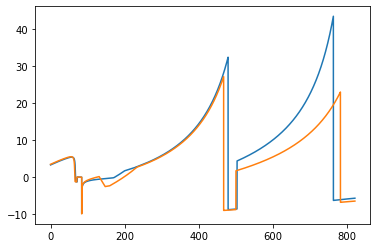

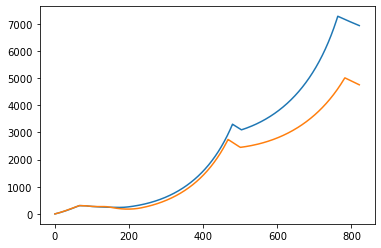

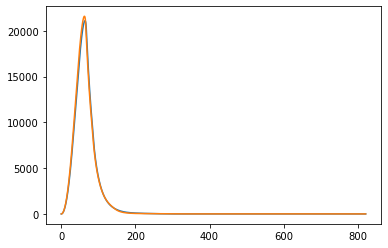

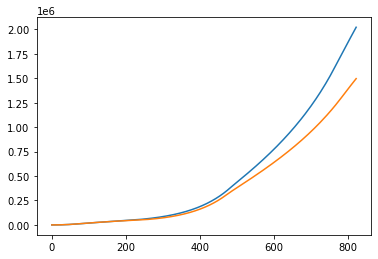

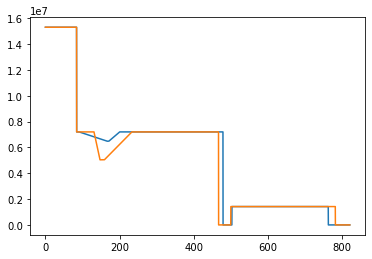

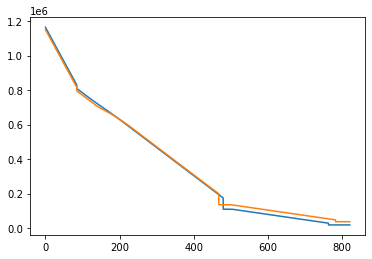

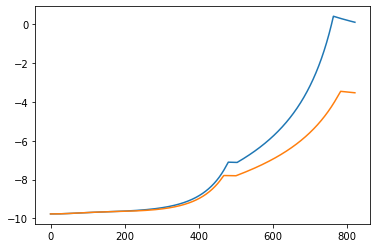

In [301]:
plt.figure(1)
plt.plot(r_time, acceleration_curr)
plt.plot(r_time, acceleration_in)

plt.figure(2)
plt.plot(r_time, velocity_curr)
plt.plot(r_time, velocity_in)

plt.figure(3)
plt.plot(r_time, MaxQ_curr)
plt.plot(r_time, MaxQ_in)

plt.figure(4)
plt.plot(r_time, altitude_curr)
plt.plot(r_time, altitude_in)

plt.figure(5)
plt.plot(r_time, thrust_curr)
plt.plot(r_time, thrust_in)

plt.figure(6)
plt.plot(r_time, mass_curr)
plt.plot(r_time, mass_in)

plt.figure(7)
plt.plot(r_time, orbital_acc_curr)
plt.plot(r_time, orbital_acc_in)